<a href="https://colab.research.google.com/github/BriannaSanchez05/FirstProject/blob/main/ML_Coding_Project_Cybersecurity_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Detecting Network Attacks**

---

**Description:** 

In this project, you’ll use decision trees to identify and predict network intrusion activities from a real-world network traffic dataset. You’ll use techniques such as EDA (exploratory data analysis),  decision trees, modifying decision tree parameters and comparing to other models to understand patterns in the data and predict malicious activity.



## Overview
---

Nowadays, we rely heavily on technology and artificial intelligence (AI) systems, and this makes cybersecurity increasingly important. Cyber attacks happen more often and are becoming more sophisticated and costly. They can harm individuals, businesses, and even nations. Cybersecurity is necessary to protect our data and systems from harm.

In this project, you'll study a real-world dataset that shows how computers connect to each other through a network. This dataset will help you identify patterns and relationships in network traffic data. Network traffic refers to the flow of data between different computers connected to a network. You'll be analyzing features like IP addresses, ports, and protocols. IP addresses are unique identifiers assigned to each device connected to the internet, while ports are virtual "doors" through which data passes in and out of a device. Protocols are sets of rules that define how data is transmitted over a network.

By analyzing these features, you will perform two classification tasks. One will be to classify normal and malicious network traffic, which will improve security measures and detect emerging threats. The next task is a multi-class classification task where you will identify if a network connection is normal or one of several attack categories. 

At the end of the notebook, you will reccommend which models are best to use for classifying network activity to help a client improve security measures and detect emerging threats.


<br>

**More about the dataset:**

> The UNSW-NB15 dataset is a network traffic dataset designed for intrusion detection research in cybersecurity. It contains a comprehensive set of features including both normal and malicious traffic extracted from raw network traffic data. With over two million records and more than 40 features, the UNSW-NB15 dataset is one of the most widely used datasets for cybersecurity research, and it provides a valuable resource for developing and testing intrusion detection systems.


<br>

This project is broken into four parts:
* In **Part 1**, you will perform Exploratory Data Analysis (EDA) on the dataset and will visualize some of the data. 
* In **Part 2**, you will compare using a KNN vs. Decision Tree Classifier for a binary classification task to determine if network traffic is normal or malicious.
* In **Part 3**, you will take your analysis one step further to do a multi-class classification task of determine if the network traffic is normal or one of several categories of network attacks.
* In **Part 4**, you will reflect on your findings and consider the ethics of cybersecurity. 


**Throughout the notebook, you will be asked questions about the project. You are required to include the answers to these questions in your Project Summary.**

<br>

**Resources**:
* [Network Intrustion Dataset Codebook](https://docs.google.com/spreadsheets/d/14hqyl05flbS3sSa4ZSgrRffsPQyuy2NI/edit?usp=sharing&ouid=101998331531919586698&rtpof=true&sd=true) explaining what each feature means.
* [Pandas Cheat Sheet](https://docs.google.com/document/d/1V1SlVzxIrMJVE2JqggRjspmD5BmcdbK9Osm6vEuv1Gc/edit?usp=sharing)
* [Data Visualization in Matplotlib Cheat Sheet](https://docs.google.com/document/d/1Nqj-ly90TKbm-WqoWM9aBy3xD-TouLoi5J8Z46FSkU0/edit?usp=sharing)
* Week 10 [Lab](https://colab.research.google.com/drive/1jppoWvCUTf0UlgVINvQUrIqqwA0xKoji?usp=share_link) 
* Week 11 [Lab](https://colab.research.google.com/drive/1bJgIKkZAHME0nynKfS91aNOvVe4rNfwB?usp=share_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### **Part 1: Exploratory Data Analysis (EDA)**
---

In Part 1, we will perform EDA to better understand the dataset. We will do this in two parts:
* **Data Cleaning**
* **Data Visualization**



#### **Part 1.1: Data Cleaning**

We will begin by loading the data.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/erandabregasi/TRAIN_1/main/UNSW_NB15_training-set.csv')

##### **Problem 1:** Display the first 5 rows of the dataset. 

In [3]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


##### **Problem 2:** Use Pandas to remove any rows with missing values (null values) from our data.

In [4]:
data = data.dropna(axis=0, how='any', subset=None)

##### **Problem 3:** Next, drop any duplicate rows. 

In [5]:
data = data.drop_duplicates()

Great job cleaning the data! Run the cell below for a summary of the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

#### **Part 1.2: Data Visualization**
Visualizing patterns in the data can give us insights that will help us build our models. This part of EDA is crucial, especially when dealing with large data. Since we're trying to predict malicious activity in the network, we can start by first visualizing the types of cybersecurity attacks. 


##### **Problem 4:** View the top 5 attack categories.

Look through the codebook to find the name of the feature column that contains the name of each attack category. Add it where indicated and run the cell below to view the top 5 attack categories prevalent in the data.

In [7]:
# Display the top 5 attack categories
attack_counts = data['attack_cat'].value_counts().nlargest(5)
print("Top 5 attack categories:")
print(attack_counts)

Top 5 attack categories:
Normal      37000
Generic     18871
Exploits    11132
Fuzzers      6062
DoS          4089
Name: attack_cat, dtype: int64


##### **Problem 5:** Visualize the distribution of attack categories using a bar plot.

Add the column name you found in the previous problem where indicated and fill in the inputs for the bar plot.


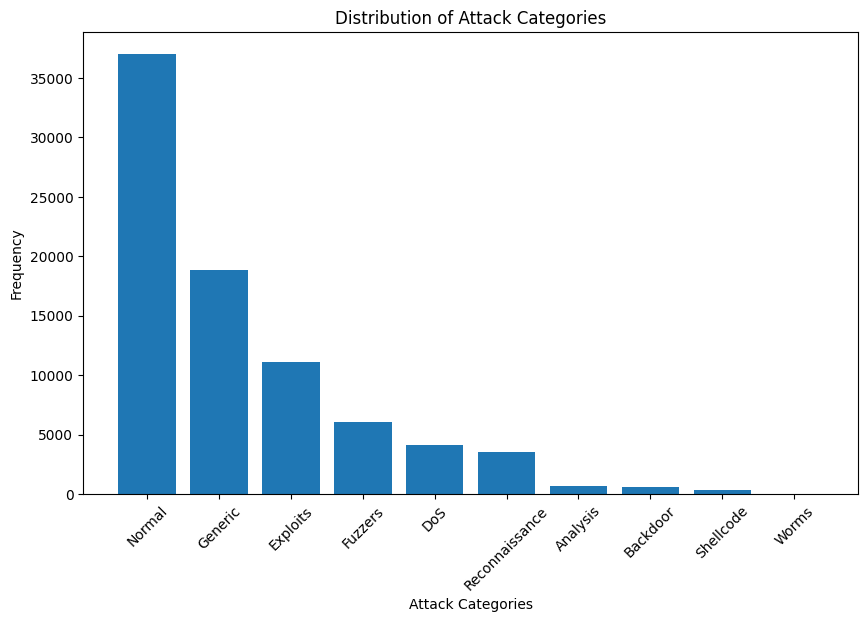

In [8]:
# Distribution of the attack categories
attack_categories = data['attack_cat'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(attack_categories.index, attack_categories.values)
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

At this stage, it is best practice to **check if the data is balanced**. 

Balanced data is important to ensure that machine learning models are not biased towards one particular outcome, leading to fair and accurate predictions for all outcomes.

**Run the cell below to check the balance between the normal and malicious network connections.**

In [9]:
# Calculate the proportion of normal and malicious network connections
normal_count = len(data[data['label'] == 0])
malicious_count = len(data[data['label'] == 1])
total_count = len(data)

normal_percentage = (normal_count / total_count) * 100
malicious_percentage = (malicious_count / total_count) * 100

# Display the proportions
print(f'Normal network connections: {normal_percentage:.2f}%')
print(f'Malicious network connections: {malicious_percentage:.2f}%')

Normal network connections: 44.94%
Malicious network connections: 55.06%


##### **Question 1:** Is the data is balanced or imbalanced? What range of values can the proportions be to still be considered balanced?

In [ ]:
"""
The data is balanced. ... 
""";



<br>

**Before we proceed**, we need to decide our target variable, which will tell us whether or not there has been a network attack.

##### **Problem 6:** Plot the class distribution.

Look through your codebook to find the column that contains the target variable. It is a binary variable that will be 0 for normal and 1 for attack records. Plot the target variable you found using `matplotlib` by filling in the code where indicated.

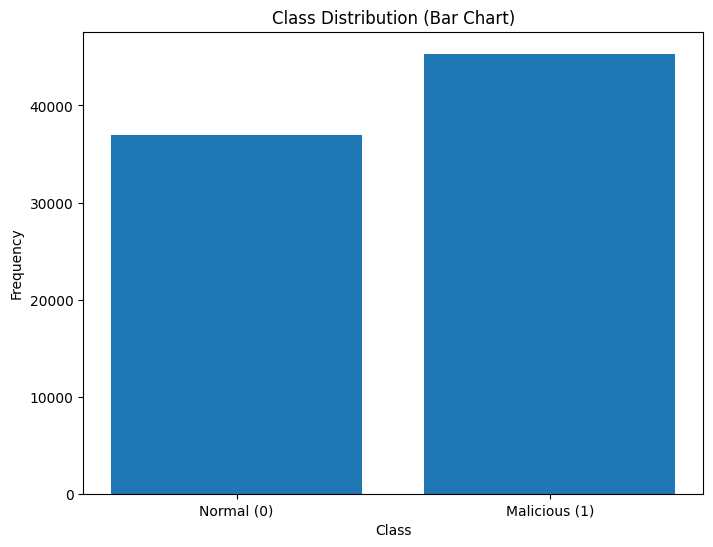

In [10]:
# Bar chart
plt.figure(figsize=(8, 6))
class_counts = data['label'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.title('Class Distribution (Bar Chart)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Normal (0)', 'Malicious (1)'])
plt.show()

##### **Problem 7:** Calculate the correlation matrix using `pandas`.

In [11]:
correlation_matrix = data.corr()

 **Run the cell below to visualize the correlation of variables through the `heatmap` representation.** 

Darker colors indicate higher correlation.

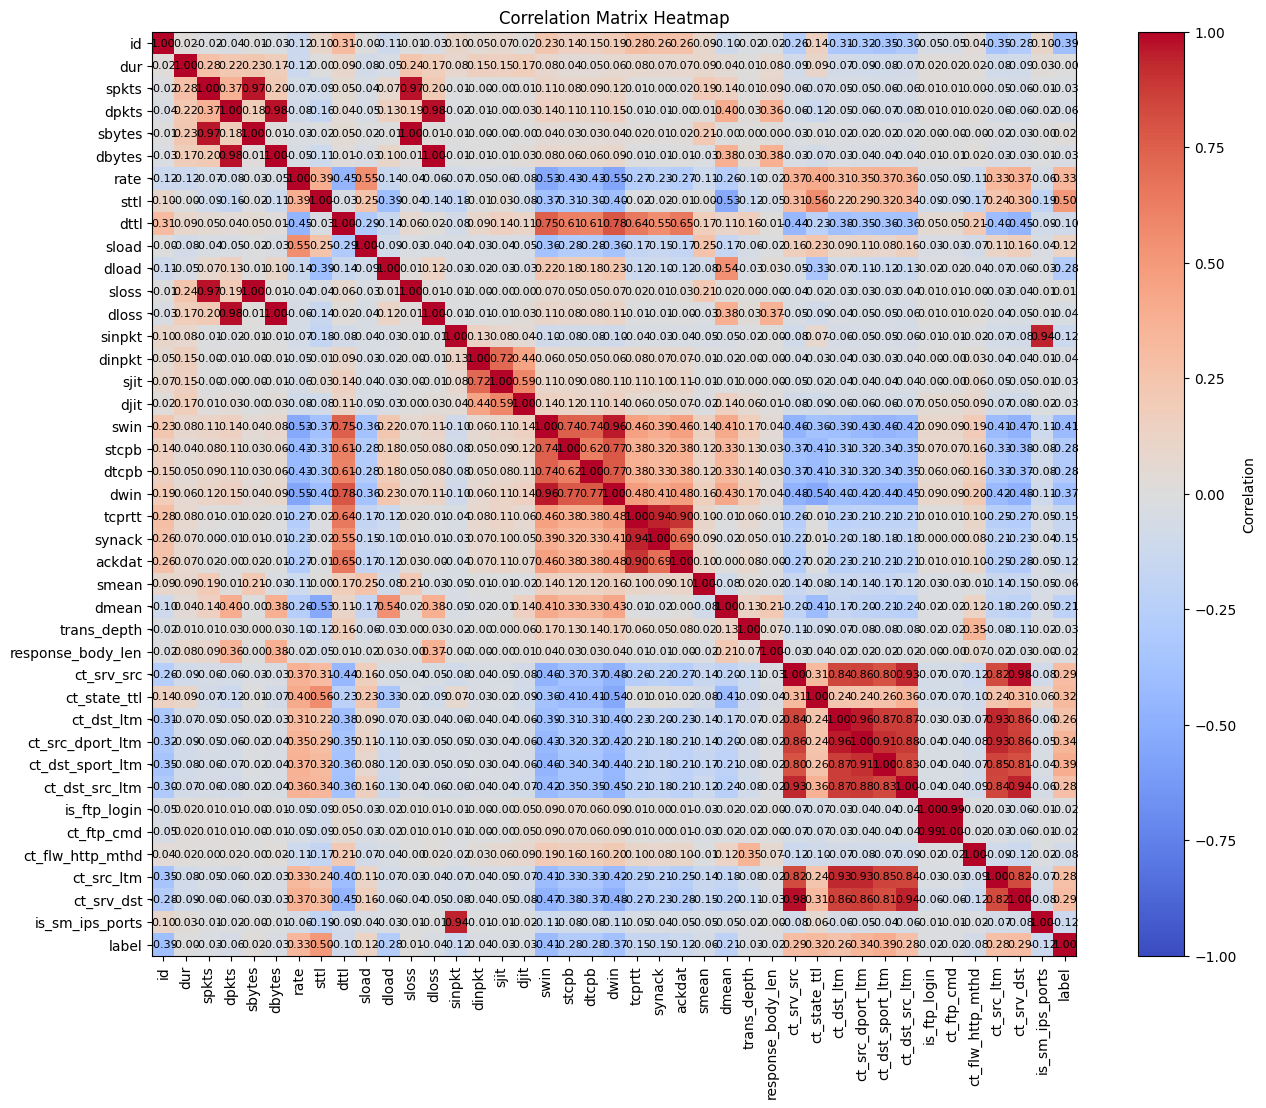

In [12]:
# Plot the correlation matrix using a heatmap in Matplotlib
plt.figure(figsize=(16, 12))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')

# Add correlation values to the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, '{:.2f}'.format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black', fontsize=8)

plt.show()

##### **Question 2:** What does it mean if two columns are correlated?

In [ ]:
"""
If two columns are correlated it means they are very similar or in some cases exactly the same.
""";

### **Part 2: Battle of the Models: KNN vs. Decision Tree**
---
In this section, you will build a KNN model and a Decision Tree model and compare the results of a binary classification task. You will be classifying network connections as either normal or malicious.

#### **Part 2.1: KNNs**
---

First, train a KNN model on the dataset and evaluate its performance using accuracy and the classification report. 


**Run the cell below to process the data and split into train and test sets.**

In [13]:
# Data Processing
X = data.drop('label', axis=1)
X = pd.get_dummies(X)  # One-hot encoding for categorical features
y = data['label']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

##### **Problem 8:** Train a KNN model on the dataset and evaluate its performance using accuracy and the classification report.

Create a `KNeighborsClassifer` model with `n_neighbors=5`. Then, complete the code below to fit, predict, and evaluate the model.

In [14]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict using the KNN model
knn_predictions = knn.predict(X_test)

# Evaluate the accuracy of the model
print("KNN Accuracy:", 
      accuracy_score(y_test, knn_predictions))

# Generate a classification report
print("KNN Classification Report:\n", 
      classification_report(y_test, knn_predictions))

KNN Accuracy: 0.8117408906882592
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79     11147
           1       0.83      0.82      0.83     13553

    accuracy                           0.81     24700
   macro avg       0.81      0.81      0.81     24700
weighted avg       0.81      0.81      0.81     24700



#### **Part 2.2: Decision Trees**
---
Next, you will use decision trees to classify network connections as either normal or malicious.

##### **Problem 9:** Train a Decision Tree model on the dataset and evaluate its performance using accuracy and the classification report.

In [15]:
# Create a Decision Tree model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train,y_train)
# Predict using the Decision Tree model
dt_predictions = dt.predict(X_test)

# Evaluate the accuracy of the model
print("Decision Tree Accuracy:",
      accuracy_score(y_test, dt_predictions))

# Generate a classification report
print("Decision Tree Classification Report:\n", 
      classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11147
           1       1.00      1.00      1.00     13553

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700



##### **Question 3:** Which model performed better?

In [ ]:
"""
The decision tree model performed better.
""";

### **Part 3: Multi-Class Classification of Attack Categories**
---
In this section, you will do a multi-class classification task of classifying network connections by attack categories. For this task, you will train and evaluate a decision tree model.

**Run the cell below to process the data and split the data into training and testing sets.**

In [16]:
# Data Processing
X_multi = data.drop('attack_cat', axis=1)  
X_multi = pd.get_dummies(X_multi)  
y_multi = data['attack_cat']  

# Split the dataset into train and test sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42)

##### **Problem 10:** Train and evaluate a Decision Tree model for multi-class classification. Evaluate its performance using accuracy and classification report.


In [17]:
# Create a Decision Tree model
dt_multi = DecisionTreeClassifier()

# Train the model on the training set
dt_multi.fit(X_train_multi,y_train_multi)

# Make predictions on the testing set
dt_multi_predictions = dt_multi.predict(X_test_multi)

# Evaluate the accuracy of the model
print("Decision Tree Accuracy:", 
      accuracy_score(y_test_multi, dt_multi_predictions))

# Generate a classification report
print("Decision Tree Classification Report:\n", 
      classification_report(y_test_multi, dt_multi_predictions))

Decision Tree Accuracy: 0.8877327935222672
Decision Tree Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.10      0.09      0.09       210
      Backdoor       0.03      0.03      0.03       176
           DoS       0.35      0.37      0.36      1185
      Exploits       0.71      0.71      0.71      3352
       Fuzzers       0.83      0.82      0.83      1801
       Generic       0.99      0.98      0.98      5635
        Normal       1.00      1.00      1.00     11147
Reconnaissance       0.83      0.81      0.82      1064
     Shellcode       0.55      0.59      0.57       119
         Worms       0.40      0.36      0.38        11

      accuracy                           0.89     24700
     macro avg       0.58      0.58      0.58     24700
  weighted avg       0.89      0.89      0.89     24700



##### **Question 4:** What is the difference between multi-class and multi-label classification?

In [ ]:
"""
WRITE YOUR ANSWER HERE
""";

### **Part 4: Findings, recommendations, and ethical considerations.**

Now that you have performed the classification tasks for the network traffic, it is time to review your findings, make recommendations, and consider the ethical implications.


#### **Part 4.1: Findings and Recommendations**

Imagine a client provided you this dataset. Based on the results from the models you trained and evaluated, make some observations and recommendations to the client. Answer the following questions to help the client decide which models to use for detecting malicious activity on the network intrusion dataset. 

##### **Question 5:** Which model would you suggest the client uses for binary classification and why? 




In [ ]:
"""
WRITE YOUR ANSWER HERE
""";

##### **Question 6:** Summarize your findings for the multi-class classification task. Overall, would you recommend the client to use *binary* or *multiclass* classification? 

In [ ]:
"""
WRITE YOUR ANSWER HERE
""";

#### **Part 4.2: Ethics**

When working with cybersecurity data, it is crucial to consider the ethical implications of the analysis and the models we create. These include:

1. Privacy: Ensure that the data we use for analysis does not contain personal information or other sensitive information that could compromise an individual's privacy.

2. Bias: Potential biases in the data which could affect the models' performance and fairness.

3. Transparency: The methods and models used for classification should be transparent and well-documented, allowing others to understand and reproduce the results.



##### **Question 7:** What are some potential ethical concerns when using machine learning models for cybersecurity applications? How can they be mitigated?

In [ ]:
"""
WRITE YOUR ANSWER HERE
""";

##### **Question 8:** What steps can you take to ensure that the data used for analysis is free of personally identifiable information?

In [ ]:
"""
WRITE YOUR ANSWER HERE
""";

**Please make sure to add the answers to all the above questions in your Project Summary.**

**Congratulations on finishing the coding project!** In this notebook, you applied exploratory data analysis and trained different models to find meaningful patterns and make insightful reccommendations from a real-world network intrusion dataset.


---
### © 2023 The Coding School, All rights reserved